In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/ek/scikit_learn_data


In [4]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [9]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [10]:
type(faces)

sklearn.utils.Bunch

In [12]:
print(faces.data.shape)

(400, 4096)


In [13]:
np.sqrt(4096)

64.0

In [14]:
faces.images.shape

(400, 64, 64)

In [15]:
print(np.all(faces.images.reshape((400, 4096)) == faces.data))

True


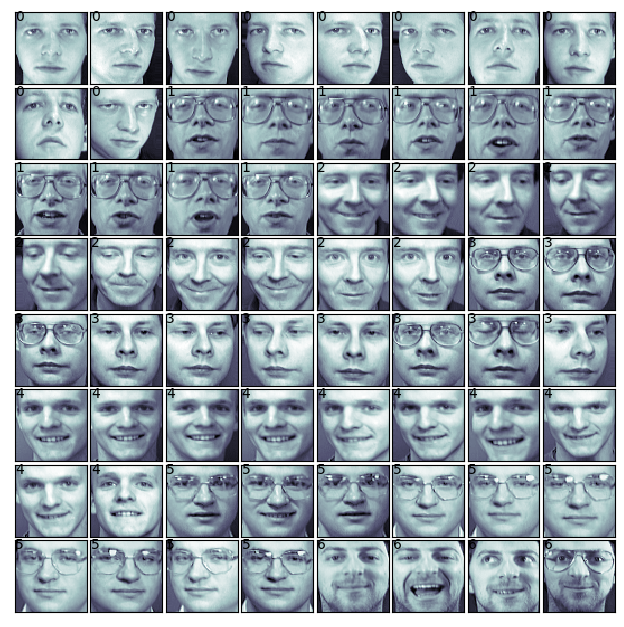

In [16]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    ax.text(0, 7, str(faces.target[i]))

In [17]:
print("Number of unique targets:", len(set(faces.target)))

Number of unique targets: 40


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=100, whiten=True)
X_pca = pca.fit_transform(faces.data)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, faces.target, test_size=0.2, random_state=42)

In [22]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9125


# TESTING THE MODEL WITH A FACE FOR FACE RECOGNITION

In [24]:
from PIL import Image

### Load image

In [25]:
new_image = Image.open("new_face.jpg").convert('L')
new_face = np.array(new_image.resize((64, 64))) / 255.0


### PreProcess the Image

In [26]:
new_face = pca.transform(new_face.reshape(1, -1))

### Use the trained SVM classifier to predict the identity of the new face

In [27]:
prediction = clf.predict(new_face)[0]
print("Predicted person:", prediction)

Predicted person: 0


### Lets try another image

In [44]:
new_image2 = Image.open("new_face2.jpg").convert('L')
new_face2 = np.array(new_image2.resize((64, 64))) / 255.0


In [45]:
new_face2 = pca.transform(new_face2.reshape(1, -1))

In [46]:
prediction = clf.predict(new_face2)[0]
print("Predicted person:", prediction)

Predicted person: 4


In [47]:
new_image3 = Image.open("new_face3.jpg").convert('L')
new_face3 = np.array(new_image3.resize((64, 64))) / 255.0


In [48]:
new_face3 = pca.transform(new_face3.reshape(1, -1))

In [49]:
prediction = clf.predict(new_face3)[0]
print("Predicted person:", prediction)

Predicted person: 6


In [52]:
new_image4 = Image.open("new_face4.jpg").convert('L')
new_face4 = np.array(new_image4.resize((64, 64)))/255.0

In [53]:
new_face4 = pca.transform(new_face4.reshape(1,-1))

In [54]:
prediction = clf.predict(new_face4)[0]
print("The Predicted person is:", prediction)

The Predicted person is: 0
